# Assignment Solution

### Importing packages and files

In [588]:
import pandas as pd

In [589]:
order_list=pd.read_csv('C:/Users/lmeer/Documents/Personal/Assignments/Robotics/assignment_1_order_list (3).csv', index_col=0)

In [590]:
status_list=pd.read_csv('C:/Users/lmeer/Documents/Personal/Assignments/Robotics/assignment_1_status_list (1) (3).csv', index_col=0)

#### Converting the datasets into DataFrames 

In [591]:
orders=pd.DataFrame(order_list)

In [592]:
statuses=pd.DataFrame(status_list)

#### Exploring the two datasets

In [593]:
orders.head()

,ORDER_CREATED_AT,DELIVERY_SCHEDULE,TRIP_ID,NUM_OF_LINES
ORDER_ID,,,,
2245835,2019-06-13 21:48:54,2019-06-14 11:30:00,s_2019-06-14_14:30,6
2247282,2019-06-13 21:18:53,2019-06-14 11:30:00,s_2019-06-14_14:30,5
2247281,2019-06-13 21:16:53,2019-06-14 11:30:00,s_2019-06-14_14:30,10
2244971,2019-06-13 21:05:56,2019-06-14 11:30:00,s_2019-06-14_14:30,11
2244970,2019-06-13 21:02:54,2019-06-14 11:30:00,s_2019-06-14_14:30,6


In [594]:
statuses.head()

,ORDER_STATUS,STATUS_TIME
ORDER_ID,,
2237317,in_progress,2019-06-10 01:07:29
2234747,in_progress,2019-06-10 02:43:28
2237334,in_progress,2019-06-10 04:11:28
2234763,in_progress,2019-06-10 04:22:29
2237343,in_progress,2019-06-10 04:26:29


<font color=purple>__Since both of the datasets have ORDER_ID as an index and it doesn't contribute any ease of access to information, I will reset it and convert it to a column in the dataframe__</font>

In [595]:
orders.reset_index(inplace=True)

In [596]:
statuses.reset_index(inplace=True)

In [597]:
orders.head()

,ORDER_ID,ORDER_CREATED_AT,DELIVERY_SCHEDULE,TRIP_ID,NUM_OF_LINES
0,2245835,2019-06-13 21:48:54,2019-06-14 11:30:00,s_2019-06-14_14:30,6
1,2247282,2019-06-13 21:18:53,2019-06-14 11:30:00,s_2019-06-14_14:30,5
2,2247281,2019-06-13 21:16:53,2019-06-14 11:30:00,s_2019-06-14_14:30,10
3,2244971,2019-06-13 21:05:56,2019-06-14 11:30:00,s_2019-06-14_14:30,11
4,2244970,2019-06-13 21:02:54,2019-06-14 11:30:00,s_2019-06-14_14:30,6


In [598]:
statuses.head()

,ORDER_ID,ORDER_STATUS,STATUS_TIME
0,2237317,in_progress,2019-06-10 01:07:29
1,2234747,in_progress,2019-06-10 02:43:28
2,2237334,in_progress,2019-06-10 04:11:28
3,2234763,in_progress,2019-06-10 04:22:29
4,2237343,in_progress,2019-06-10 04:26:29


<font color=purple>__Changing the upper case to lower for the column names so it would be easier to work with down the road__</font>

In [599]:
orders.columns=orders.columns.str.lower()

In [600]:
statuses.columns=statuses.columns.str.lower()

In [601]:
orders.head()

,order_id,order_created_at,delivery_schedule,trip_id,num_of_lines
0,2245835,2019-06-13 21:48:54,2019-06-14 11:30:00,s_2019-06-14_14:30,6
1,2247282,2019-06-13 21:18:53,2019-06-14 11:30:00,s_2019-06-14_14:30,5
2,2247281,2019-06-13 21:16:53,2019-06-14 11:30:00,s_2019-06-14_14:30,10
3,2244971,2019-06-13 21:05:56,2019-06-14 11:30:00,s_2019-06-14_14:30,11
4,2244970,2019-06-13 21:02:54,2019-06-14 11:30:00,s_2019-06-14_14:30,6


In [602]:
statuses.head()

,order_id,order_status,status_time
0,2237317,in_progress,2019-06-10 01:07:29
1,2234747,in_progress,2019-06-10 02:43:28
2,2237334,in_progress,2019-06-10 04:11:28
3,2234763,in_progress,2019-06-10 04:22:29
4,2237343,in_progress,2019-06-10 04:26:29


<font color=purple>__Exploring the data for missing values__</font>

In [603]:
orders.isna().any()

order_id             False
order_created_at     False
delivery_schedule    False
trip_id              False
num_of_lines         False
dtype: bool

In [604]:
statuses.isna().any()

order_id        False
order_status    False
status_time     False
dtype: bool

<font color=purple>__Exploring the data types of each dataframe__</font>

In [605]:
orders.dtypes

order_id             object
order_created_at     object
delivery_schedule    object
trip_id              object
num_of_lines          int64
dtype: object

In [606]:
statuses.dtypes

order_id        object
order_status    object
status_time     object
dtype: object

<font color=purple>__Exploring data size__</font>

In [607]:
orders.shape

(758, 5)

In [608]:
statuses.shape

(5128, 3)

<font color=purple>__In order to understand the data a little bit better, I want to see how many unique orders there are in each table__</font>

In [609]:
orders['order_id'].nunique()

758

In [610]:
statuses['order_id'].nunique()

758

### Question 1

### Since the status_time is a string we convert it into an object before proceeding

In [611]:
statuses['status_time'] = pd.to_datetime(statuses['status_time'])

In [612]:
statuses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5128 entries, 0 to 5127
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      5128 non-null   object        
 1   order_status  5128 non-null   object        
 2   status_time   5128 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 120.3+ KB


### checking for a random order the different status times, we can see that 'in_progress' appears twice, we only want the last updated time

In [613]:
statuses[statuses["order_id"].isin(["2237317"])]

,order_id,order_status,status_time
0,2237317,in_progress,2019-06-10 01:07:29
27,2237317,in_progress,2019-06-10 06:22:52
48,2237317,picked,2019-06-10 07:01:39
68,2237317,started_dispatch,2019-06-10 07:15:21
74,2237317,in_dispatch_buffer,2019-06-10 07:20:43
80,2237317,packed,2019-06-10 07:23:51
1086,2237317,dispatched,2019-06-10 20:16:39


#### For each order and status, find the last time the status was updated

In [614]:
lat_sts_time=pd.DataFrame(statuses.groupby(["order_id","order_status"])["status_time"].max())

#### Making sure that after the update there is only one status time for each order and order status

In [615]:
g = lat_sts_time.groupby(['order_status','order_id'])

In [616]:
g.filter(lambda x: len(x) > 1)

,,status_time
order_id,order_status,


#### Converting the indexes of dataframe lat_sts_time to columns

In [617]:
lat_sts_time.reset_index(inplace=True)

#### also, we can see that for the previous checked order_id there is only one status time, the latest

In [618]:
lat_sts_time[lat_sts_time["order_id"].isin(["2237317"])]

,order_id,order_status,status_time
610,2237317,dispatched,2019-06-10 20:16:39
611,2237317,in_dispatch_buffer,2019-06-10 07:20:43
612,2237317,in_progress,2019-06-10 06:22:52
613,2237317,packed,2019-06-10 07:23:51
614,2237317,picked,2019-06-10 07:01:39
615,2237317,started_dispatch,2019-06-10 07:15:21


#### Since there are multiple rows for an order_id and in the final result we only want to see one record per order_id, I've pivoted the dataframe

In [619]:
status_p = lat_sts_time.pivot(index='order_id', columns='order_status', values='status_time')

In [620]:
status_p.head()

order_status,dispatched,in_dispatch_buffer,in_progress,order_aborted,packed,picked,started_dispatch
order_id,,,,,,,
2196242,2019-06-10 18:21:11,2019-06-10 16:10:43,2019-06-10 07:47:39,NaT,2019-06-10 16:12:43,2019-06-10 07:54:45,2019-06-10 16:04:06
2196257,2019-06-10 18:21:27,2019-06-10 16:30:34,2019-06-10 16:04:27,NaT,2019-06-10 16:32:16,2019-06-10 16:22:24,2019-06-10 16:26:40
2196264,2019-06-11 17:52:39,2019-06-11 09:17:23,2019-06-11 08:51:24,NaT,2019-06-11 09:40:58,2019-06-11 08:59:03,2019-06-11 08:59:08
2196274,2019-06-11 17:52:43,2019-06-11 11:08:23,2019-06-11 10:39:54,NaT,2019-06-11 11:11:18,2019-06-11 10:46:33,2019-06-11 10:51:08
2196285,2019-06-12 16:14:51,2019-06-12 09:50:24,2019-06-12 09:42:21,NaT,2019-06-12 10:24:33,2019-06-12 09:48:56,2019-06-12 09:49:16


#### Changing the order of hte order_status columns to fit the process

In [621]:
status_p=status_upd[['in_progress','picked','started_dispatch','in_dispatch_buffer','packed','dispatched','order_aborted']]

In [622]:
status_p.head()

order_status,in_progress,picked,started_dispatch,in_dispatch_buffer,packed,dispatched,order_aborted
order_id,,,,,,,
2196242,2019-06-10 07:47:39,2019-06-10 07:54:45,2019-06-10 16:04:06,2019-06-10 16:10:43,2019-06-10 16:12:43,2019-06-10 18:21:11,NaN
2196257,2019-06-10 16:04:27,2019-06-10 16:22:24,2019-06-10 16:26:40,2019-06-10 16:30:34,2019-06-10 16:32:16,2019-06-10 18:21:27,NaN
2196264,2019-06-11 08:51:24,2019-06-11 08:59:03,2019-06-11 08:59:08,2019-06-11 09:17:23,2019-06-11 09:40:58,2019-06-11 17:52:39,NaN
2196274,2019-06-11 10:39:54,2019-06-11 10:46:33,2019-06-11 10:51:08,2019-06-11 11:08:23,2019-06-11 11:11:18,2019-06-11 17:52:43,NaN
2196285,2019-06-12 09:42:21,2019-06-12 09:48:56,2019-06-12 09:49:16,2019-06-12 09:50:24,2019-06-12 10:24:33,2019-06-12 16:14:51,NaN


#### Convert again the order_id from index to a clomun

In [623]:
status_p.reset_index(inplace=True)

In [624]:
status_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            758 non-null    object
 1   in_progress         750 non-null    object
 2   picked              732 non-null    object
 3   started_dispatch    728 non-null    object
 4   in_dispatch_buffer  729 non-null    object
 5   packed              729 non-null    object
 6   dispatched          724 non-null    object
 7   order_aborted       34 non-null     object
dtypes: object(8)
memory usage: 47.5+ KB


In [625]:
status_p.shape

(758, 8)

In [626]:
status_p.head()

order_status,order_id,in_progress,picked,started_dispatch,in_dispatch_buffer,packed,dispatched,order_aborted
0,2196242,2019-06-10 07:47:39,2019-06-10 07:54:45,2019-06-10 16:04:06,2019-06-10 16:10:43,2019-06-10 16:12:43,2019-06-10 18:21:11,NaN
1,2196257,2019-06-10 16:04:27,2019-06-10 16:22:24,2019-06-10 16:26:40,2019-06-10 16:30:34,2019-06-10 16:32:16,2019-06-10 18:21:27,NaN
2,2196264,2019-06-11 08:51:24,2019-06-11 08:59:03,2019-06-11 08:59:08,2019-06-11 09:17:23,2019-06-11 09:40:58,2019-06-11 17:52:39,NaN
3,2196274,2019-06-11 10:39:54,2019-06-11 10:46:33,2019-06-11 10:51:08,2019-06-11 11:08:23,2019-06-11 11:11:18,2019-06-11 17:52:43,NaN
4,2196285,2019-06-12 09:42:21,2019-06-12 09:48:56,2019-06-12 09:49:16,2019-06-12 09:50:24,2019-06-12 10:24:33,2019-06-12 16:14:51,NaN


In [627]:
status_p.columns.tolist()

['order_id',
 'in_progress',
 'picked',
 'started_dispatch',
 'in_dispatch_buffer',
 'packed',
 'dispatched',
 'order_aborted']

In [628]:
status_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            758 non-null    object
 1   in_progress         750 non-null    object
 2   picked              732 non-null    object
 3   started_dispatch    728 non-null    object
 4   in_dispatch_buffer  729 non-null    object
 5   packed              729 non-null    object
 6   dispatched          724 non-null    object
 7   order_aborted       34 non-null     object
dtypes: object(8)
memory usage: 47.5+ KB


#### Converting all status times to datetime objects

In [629]:
cols_7_extract = status_p.columns[1:8]

In [630]:
status_p[cols_7_extract] = status_p[cols_7_extract].applymap(lambda x : pd.to_datetime(x))

#### Now all the time values are in the correct format

In [631]:
status_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            758 non-null    object        
 1   in_progress         750 non-null    datetime64[ns]
 2   picked              732 non-null    datetime64[ns]
 3   started_dispatch    728 non-null    datetime64[ns]
 4   in_dispatch_buffer  729 non-null    datetime64[ns]
 5   packed              729 non-null    datetime64[ns]
 6   dispatched          724 non-null    datetime64[ns]
 7   order_aborted       34 non-null     datetime64[ns]
dtypes: datetime64[ns](7), object(1)
memory usage: 47.5+ KB


#### Performing a full outer join to the orders dataframe
#### the reason for the outer join is because some orders may exist in one table but not in the other
#### For example, there could be orders creates but haven't started the status process

In [632]:
merged_df = pd.merge(status_p,orders,how='outer',on=['order_id'])

In [633]:
merged_df.head()

,order_id,in_progress,picked,started_dispatch,in_dispatch_buffer,packed,dispatched,order_aborted,order_created_at,delivery_schedule,trip_id,num_of_lines
0,2196242,2019-06-10 07:47:39,2019-06-10 07:54:45,2019-06-10 16:04:06,2019-06-10 16:10:43,2019-06-10 16:12:43,2019-06-10 18:21:11,NaT,2019-06-10 05:48:30,2019-06-10 18:00:00,s_2019-06-10_21:00,1.0
1,2196257,2019-06-10 16:04:27,2019-06-10 16:22:24,2019-06-10 16:26:40,2019-06-10 16:30:34,2019-06-10 16:32:16,2019-06-10 18:21:27,NaT,2019-06-10 16:04:27,2019-06-10 18:00:00,s_2019-06-10_21:00,6.0
2,2196264,2019-06-11 08:51:24,2019-06-11 08:59:03,2019-06-11 08:59:08,2019-06-11 09:17:23,2019-06-11 09:40:58,2019-06-11 17:52:39,NaT,2019-06-11 08:45:30,2019-06-11 18:00:00,s_2019-06-11_21:00,1.0
3,2196274,2019-06-11 10:39:54,2019-06-11 10:46:33,2019-06-11 10:51:08,2019-06-11 11:08:23,2019-06-11 11:11:18,2019-06-11 17:52:43,NaT,2019-06-11 10:27:29,2019-06-11 18:00:00,s_2019-06-11_21:00,2.0
4,2196285,2019-06-12 09:42:21,2019-06-12 09:48:56,2019-06-12 09:49:16,2019-06-12 09:50:24,2019-06-12 10:24:33,2019-06-12 16:14:51,NaT,2019-06-12 06:21:18,2019-06-12 14:00:00,z_2019-06-12_17:00,1.0


In [634]:
merged_df.shape

(783, 12)

In [635]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 0 to 782
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            783 non-null    object        
 1   in_progress         750 non-null    datetime64[ns]
 2   picked              732 non-null    datetime64[ns]
 3   started_dispatch    728 non-null    datetime64[ns]
 4   in_dispatch_buffer  729 non-null    datetime64[ns]
 5   packed              729 non-null    datetime64[ns]
 6   dispatched          724 non-null    datetime64[ns]
 7   order_aborted       34 non-null     datetime64[ns]
 8   order_created_at    758 non-null    object        
 9   delivery_schedule   758 non-null    object        
 10  trip_id             758 non-null    object        
 11  num_of_lines        758 non-null    float64       
dtypes: datetime64[ns](7), float64(1), object(4)
memory usage: 79.5+ KB


#### DataFrame to csv

In [636]:
merged_df.to_csv("Answer_1.csv")

## Question 2

### The steps for this answer is:
1. Convert order_created_at column to a datetime (it is a string now)
2. Substract the order_created_at from the dispatched column to get the process time for each order
3. Calculate the mean of these processes times

#### <font color=red>step 1: Convert order_created_at column to a datetime</font>

#### After exploring the merged dataframe, we see that there are 25 records where there is no value for the creation of the order, we will remove these records before proceeding

In [637]:
merged_df['order_created_at'].isna().sum()

25

In [638]:
merged_df.dropna(subset=['order_created_at'],how='any',inplace=True)

In [639]:
merged_df['order_created_at'].isna().sum()

0

In [640]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758 entries, 0 to 782
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            758 non-null    object        
 1   in_progress         727 non-null    datetime64[ns]
 2   picked              710 non-null    datetime64[ns]
 3   started_dispatch    708 non-null    datetime64[ns]
 4   in_dispatch_buffer  709 non-null    datetime64[ns]
 5   packed              709 non-null    datetime64[ns]
 6   dispatched          704 non-null    datetime64[ns]
 7   order_aborted       29 non-null     datetime64[ns]
 8   order_created_at    758 non-null    object        
 9   delivery_schedule   758 non-null    object        
 10  trip_id             758 non-null    object        
 11  num_of_lines        758 non-null    float64       
dtypes: datetime64[ns](7), float64(1), object(4)
memory usage: 77.0+ KB


In [641]:
merged_df['order_created_at'] = pd.to_datetime(merged_df['order_created_at'])

#### Verifying that the change took place

In [642]:
assert merged_df['order_created_at'].dtype=='datetime64[ns]'

#### Since we need the process time, we need to take only the records that were dispatched, we will hence filter out all the records that haven't got a value in the 'dispatched' column, we can see below that there are 54 records that need to be filtered out

In [643]:
merged_df['dispatched'].isna().sum()

54

In [644]:
merged_df.dropna(subset=['dispatched'],how='any',inplace=True)

In [645]:
merged_df['dispatched'].isna().sum()

0

#### Since there are orders that were aborted, we need to remove them from the result as well

In [646]:
merged_df=merged_df[merged_df['order_aborted'].isnull()]

#### We are remained with order_aborted column with only null values, meaning, none of the orders was aborted

In [647]:
merged_df['order_aborted'].notnull().count()

704

#### <font color=red>Step 2: Substract the order_created_at from the dispatched column to get the process time for each order</font>

In [648]:
merged_df['pr_time']=merged_df['dispatched']-merged_df['order_created_at']

In [649]:
merged_df

,order_id,in_progress,picked,started_dispatch,in_dispatch_buffer,packed,dispatched,order_aborted,order_created_at,delivery_schedule,trip_id,num_of_lines,pr_time
0,2196242,2019-06-10 07:47:39,2019-06-10 07:54:45,2019-06-10 16:04:06,2019-06-10 16:10:43,2019-06-10 16:12:43,2019-06-10 18:21:11,NaT,2019-06-10 05:48:30,2019-06-10 18:00:00,s_2019-06-10_21:00,1.0,0 days 12:32:41
1,2196257,2019-06-10 16:04:27,2019-06-10 16:22:24,2019-06-10 16:26:40,2019-06-10 16:30:34,2019-06-10 16:32:16,2019-06-10 18:21:27,NaT,2019-06-10 16:04:27,2019-06-10 18:00:00,s_2019-06-10_21:00,6.0,0 days 02:17:00
2,2196264,2019-06-11 08:51:24,2019-06-11 08:59:03,2019-06-11 08:59:08,2019-06-11 09:17:23,2019-06-11 09:40:58,2019-06-11 17:52:39,NaT,2019-06-11 08:45:30,2019-06-11 18:00:00,s_2019-06-11_21:00,1.0,0 days 09:07:09
3,2196274,2019-06-11 10:39:54,2019-06-11 10:46:33,2019-06-11 10:51:08,2019-06-11 11:08:23,2019-06-11 11:11:18,2019-06-11 17:52:43,NaT,2019-06-11 10:27:29,2019-06-11 18:00:00,s_2019-06-11_21:00,2.0,0 days 07:25:14
4,2196285,2019-06-12 09:42:21,2019-06-12 09:48:56,2019-06-12 09:49:16,2019-06-12 09:50:24,2019-06-12 10:24:33,2019-06-12 16:14:51,NaT,2019-06-12 06:21:18,2019-06-12 14:00:00,z_2019-06-12_17:00,1.0,0 days 09:53:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,2247204,2019-06-14 04:44:51,2019-06-14 04:54:16,2019-06-14 05:23:42,2019-06-14 05:30:49,2019-06-14 05:32:57,2019-06-14 11:07:29,NaT,2019-06-13 18:56:54,2019-06-14 11:30:00,s_2019-06-14_14:30,3.0,0 days 16:10:35
729,2247212,2019-06-14 04:46:28,2019-06-14 04:46:28,2019-06-14 05:33:26,2019-06-14 05:36:55,2019-06-14 05:52:49,2019-06-14 11:07:27,NaT,2019-06-13 19:05:56,2019-06-14 11:30:00,s_2019-06-14_14:30,3.0,0 days 16:01:31
730,2247238,2019-06-14 04:46:28,2019-06-14 04:46:28,2019-06-14 08:00:45,2019-06-14 08:03:34,2019-06-14 08:04:54,2019-06-14 11:07:27,NaT,2019-06-13 19:50:57,2019-06-14 11:30:00,s_2019-06-14_14:30,3.0,0 days 15:16:30
731,2247281,2019-06-14 04:46:28,2019-06-14 04:58:42,2019-06-14 07:03:29,2019-06-14 07:09:04,2019-06-14 07:09:47,2019-06-14 11:07:28,NaT,2019-06-13 21:16:53,2019-06-14 11:30:00,s_2019-06-14_14:30,10.0,0 days 13:50:35


#### <font color=red>step 3: Calculate the mean of these processes times</font>

In [650]:
print(merged_df['pr_time'].mean())

0 days 11:38:53.352272727


## Question 3

### Steps for solution:
1. Convert delivery_schedule column to datetime
1. Filter only the orders that were packed from the previous df_merged dataframe
2. Filter only the records that their packing time is before their delivery schedule time

#### <font color=magenta>step 1: Convert delivery_schedule column to datetime</font>

In [651]:
merged_df['delivery_schedule'] = pd.to_datetime(merged_df['delivery_schedule'])

In [652]:
assert merged_df['delivery_schedule'].dtype=='datetime64[ns]'

#### <font color=magenta>step 2: Filter only the packed orders, as we can see all orders were packed</font>

In [653]:
merged_df['packed'].isna().sum()

0

#### Filtering the orders that were pcked before their delivery schedule

In [654]:
early_pack=merged_df[merged_df['packed']<merged_df['delivery_schedule']]

In [655]:
early_pack.head()

,order_id,in_progress,picked,started_dispatch,in_dispatch_buffer,packed,dispatched,order_aborted,order_created_at,delivery_schedule,trip_id,num_of_lines,pr_time
0,2196242,2019-06-10 07:47:39,2019-06-10 07:54:45,2019-06-10 16:04:06,2019-06-10 16:10:43,2019-06-10 16:12:43,2019-06-10 18:21:11,NaT,2019-06-10 05:48:30,2019-06-10 18:00:00,s_2019-06-10_21:00,1.0,0 days 12:32:41
1,2196257,2019-06-10 16:04:27,2019-06-10 16:22:24,2019-06-10 16:26:40,2019-06-10 16:30:34,2019-06-10 16:32:16,2019-06-10 18:21:27,NaT,2019-06-10 16:04:27,2019-06-10 18:00:00,s_2019-06-10_21:00,6.0,0 days 02:17:00
2,2196264,2019-06-11 08:51:24,2019-06-11 08:59:03,2019-06-11 08:59:08,2019-06-11 09:17:23,2019-06-11 09:40:58,2019-06-11 17:52:39,NaT,2019-06-11 08:45:30,2019-06-11 18:00:00,s_2019-06-11_21:00,1.0,0 days 09:07:09
3,2196274,2019-06-11 10:39:54,2019-06-11 10:46:33,2019-06-11 10:51:08,2019-06-11 11:08:23,2019-06-11 11:11:18,2019-06-11 17:52:43,NaT,2019-06-11 10:27:29,2019-06-11 18:00:00,s_2019-06-11_21:00,2.0,0 days 07:25:14
4,2196285,2019-06-12 09:42:21,2019-06-12 09:48:56,2019-06-12 09:49:16,2019-06-12 09:50:24,2019-06-12 10:24:33,2019-06-12 16:14:51,NaT,2019-06-12 06:21:18,2019-06-12 14:00:00,z_2019-06-12_17:00,1.0,0 days 09:53:33


In [656]:
early_pack.shape

(690, 13)

In [658]:
early_pack.to_csv("Answer_3_early_pack.csv")

## Question 3a 
### KPI - Average,  Interquartile range and median of delivery time
#### The interquartile range describes the difference between the third quartile (Q3) and the first quartile (Q1), telling us about the range of the middle half of the values in the distribution
#### I will consider the trip_id column as a time the order was delivered to its destination
#### I will  calculate then the delivery time since the mooment the order was created in the system
#### <font color=red>_Median is much more robust for skewed dataset_</font>
#### **steps**
1. Cleaning the trip_id column
2. Creating a column named delivered_on
3. Convering new column to datetime
4. Creating a column containig the difference between the delivered_on time and the order_created_at time

In [659]:
merged_df.head()

,order_id,in_progress,picked,started_dispatch,in_dispatch_buffer,packed,dispatched,order_aborted,order_created_at,delivery_schedule,trip_id,num_of_lines,pr_time
0,2196242,2019-06-10 07:47:39,2019-06-10 07:54:45,2019-06-10 16:04:06,2019-06-10 16:10:43,2019-06-10 16:12:43,2019-06-10 18:21:11,NaT,2019-06-10 05:48:30,2019-06-10 18:00:00,s_2019-06-10_21:00,1.0,0 days 12:32:41
1,2196257,2019-06-10 16:04:27,2019-06-10 16:22:24,2019-06-10 16:26:40,2019-06-10 16:30:34,2019-06-10 16:32:16,2019-06-10 18:21:27,NaT,2019-06-10 16:04:27,2019-06-10 18:00:00,s_2019-06-10_21:00,6.0,0 days 02:17:00
2,2196264,2019-06-11 08:51:24,2019-06-11 08:59:03,2019-06-11 08:59:08,2019-06-11 09:17:23,2019-06-11 09:40:58,2019-06-11 17:52:39,NaT,2019-06-11 08:45:30,2019-06-11 18:00:00,s_2019-06-11_21:00,1.0,0 days 09:07:09
3,2196274,2019-06-11 10:39:54,2019-06-11 10:46:33,2019-06-11 10:51:08,2019-06-11 11:08:23,2019-06-11 11:11:18,2019-06-11 17:52:43,NaT,2019-06-11 10:27:29,2019-06-11 18:00:00,s_2019-06-11_21:00,2.0,0 days 07:25:14
4,2196285,2019-06-12 09:42:21,2019-06-12 09:48:56,2019-06-12 09:49:16,2019-06-12 09:50:24,2019-06-12 10:24:33,2019-06-12 16:14:51,NaT,2019-06-12 06:21:18,2019-06-12 14:00:00,z_2019-06-12_17:00,1.0,0 days 09:53:33


#### <font color=magenta>step 1+2: Cleaning trip_id column and Creating a column named delivered_on</font>

In [667]:
merged_df['delivered_on']=merged_df['trip_id'].str.replace('_', ' ')

In [668]:
merged_df['delivered_on']=merged_df['delivered_on'].str.replace('[a-z]', '')

In [670]:
merged_df.head()

,order_id,in_progress,picked,started_dispatch,in_dispatch_buffer,packed,dispatched,order_aborted,order_created_at,delivery_schedule,trip_id,num_of_lines,pr_time,delivered_on
0,2196242,2019-06-10 07:47:39,2019-06-10 07:54:45,2019-06-10 16:04:06,2019-06-10 16:10:43,2019-06-10 16:12:43,2019-06-10 18:21:11,NaT,2019-06-10 05:48:30,2019-06-10 18:00:00,s_2019-06-10_21:00,1.0,0 days 12:32:41,2019-06-10 21:00
1,2196257,2019-06-10 16:04:27,2019-06-10 16:22:24,2019-06-10 16:26:40,2019-06-10 16:30:34,2019-06-10 16:32:16,2019-06-10 18:21:27,NaT,2019-06-10 16:04:27,2019-06-10 18:00:00,s_2019-06-10_21:00,6.0,0 days 02:17:00,2019-06-10 21:00
2,2196264,2019-06-11 08:51:24,2019-06-11 08:59:03,2019-06-11 08:59:08,2019-06-11 09:17:23,2019-06-11 09:40:58,2019-06-11 17:52:39,NaT,2019-06-11 08:45:30,2019-06-11 18:00:00,s_2019-06-11_21:00,1.0,0 days 09:07:09,2019-06-11 21:00
3,2196274,2019-06-11 10:39:54,2019-06-11 10:46:33,2019-06-11 10:51:08,2019-06-11 11:08:23,2019-06-11 11:11:18,2019-06-11 17:52:43,NaT,2019-06-11 10:27:29,2019-06-11 18:00:00,s_2019-06-11_21:00,2.0,0 days 07:25:14,2019-06-11 21:00
4,2196285,2019-06-12 09:42:21,2019-06-12 09:48:56,2019-06-12 09:49:16,2019-06-12 09:50:24,2019-06-12 10:24:33,2019-06-12 16:14:51,NaT,2019-06-12 06:21:18,2019-06-12 14:00:00,z_2019-06-12_17:00,1.0,0 days 09:53:33,2019-06-12 17:00


In [671]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 0 to 732
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   order_id            704 non-null    object         
 1   in_progress         704 non-null    datetime64[ns] 
 2   picked              704 non-null    datetime64[ns] 
 3   started_dispatch    703 non-null    datetime64[ns] 
 4   in_dispatch_buffer  704 non-null    datetime64[ns] 
 5   packed              704 non-null    datetime64[ns] 
 6   dispatched          704 non-null    datetime64[ns] 
 7   order_aborted       0 non-null      datetime64[ns] 
 8   order_created_at    704 non-null    datetime64[ns] 
 9   delivery_schedule   704 non-null    datetime64[ns] 
 10  trip_id             704 non-null    object         
 11  num_of_lines        704 non-null    float64        
 12  pr_time             704 non-null    timedelta64[ns]
 13  delivered_on        704 non-null   

#### <font color=magenta>step 3: Converting the new column to datime</font>

In [672]:
merged_df['delivered_on'] = pd.to_datetime(merged_df['delivered_on'])

In [674]:
assert merged_df['delivered_on'].dtype=='datetime64[ns]'

In [676]:
merged_df['delivered_time']=merged_df['delivered_on']-merged_df['order_created_at']

In [720]:
merged_df.head()

,order_id,in_progress,picked,started_dispatch,in_dispatch_buffer,packed,dispatched,order_aborted,order_created_at,delivery_schedule,trip_id,num_of_lines,pr_time,delivered_on,delivered_time
0,2196242,2019-06-10 07:47:39,2019-06-10 07:54:45,2019-06-10 16:04:06,2019-06-10 16:10:43,2019-06-10 16:12:43,2019-06-10 18:21:11,NaT,2019-06-10 05:48:30,2019-06-10 18:00:00,s_2019-06-10_21:00,1.0,0 days 12:32:41,2019-06-10 21:00:00,0 days 15:11:30
1,2196257,2019-06-10 16:04:27,2019-06-10 16:22:24,2019-06-10 16:26:40,2019-06-10 16:30:34,2019-06-10 16:32:16,2019-06-10 18:21:27,NaT,2019-06-10 16:04:27,2019-06-10 18:00:00,s_2019-06-10_21:00,6.0,0 days 02:17:00,2019-06-10 21:00:00,0 days 04:55:33
2,2196264,2019-06-11 08:51:24,2019-06-11 08:59:03,2019-06-11 08:59:08,2019-06-11 09:17:23,2019-06-11 09:40:58,2019-06-11 17:52:39,NaT,2019-06-11 08:45:30,2019-06-11 18:00:00,s_2019-06-11_21:00,1.0,0 days 09:07:09,2019-06-11 21:00:00,0 days 12:14:30
3,2196274,2019-06-11 10:39:54,2019-06-11 10:46:33,2019-06-11 10:51:08,2019-06-11 11:08:23,2019-06-11 11:11:18,2019-06-11 17:52:43,NaT,2019-06-11 10:27:29,2019-06-11 18:00:00,s_2019-06-11_21:00,2.0,0 days 07:25:14,2019-06-11 21:00:00,0 days 10:32:31
4,2196285,2019-06-12 09:42:21,2019-06-12 09:48:56,2019-06-12 09:49:16,2019-06-12 09:50:24,2019-06-12 10:24:33,2019-06-12 16:14:51,NaT,2019-06-12 06:21:18,2019-06-12 14:00:00,z_2019-06-12_17:00,1.0,0 days 09:53:33,2019-06-12 17:00:00,0 days 10:38:42


#### <font color=magenta>step 4: Calculating the KPI's</font>

In [680]:
import numpy as np

In [681]:
def iqr(column):
    return column.quantile(0.75)-column.quantile(0.25)

In [683]:
print(merged_df['delivered_time'].agg([iqr,np.median,np.mean]))

iqr                0 days 09:10:24
median      0 days 11:50:29.500000
mean     0 days 13:31:20.964488636
Name: delivered_time, dtype: timedelta64[ns]


In [759]:
print(merged_df['delivered_time'].agg([min,max]))

min   0 days 03:48:05
max   1 days 03:55:34
Name: delivered_time, dtype: timedelta64[ns]


#### interquartile range or the measure of spread is close to the mean and the median
#### _The spread of delivery time is not large, that means that the different carriers distributing the packages are completing the distribution more or less in the same time interval_
#### <font color=orange>__There is no advantage or diadvantage of on carries over the other__</font>

In [725]:
import numpy as np
import time
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [722]:
merged_df['delivered_time_hours'] = merged_df['delivered_time'] / np.timedelta64(1, 'h')

In [723]:
merged_df.head()

,order_id,in_progress,picked,started_dispatch,in_dispatch_buffer,packed,dispatched,order_aborted,order_created_at,delivery_schedule,trip_id,num_of_lines,pr_time,delivered_on,delivered_time,delivered_time_hours
0,2196242,2019-06-10 07:47:39,2019-06-10 07:54:45,2019-06-10 16:04:06,2019-06-10 16:10:43,2019-06-10 16:12:43,2019-06-10 18:21:11,NaT,2019-06-10 05:48:30,2019-06-10 18:00:00,s_2019-06-10_21:00,1.0,0 days 12:32:41,2019-06-10 21:00:00,0 days 15:11:30,15.191667
1,2196257,2019-06-10 16:04:27,2019-06-10 16:22:24,2019-06-10 16:26:40,2019-06-10 16:30:34,2019-06-10 16:32:16,2019-06-10 18:21:27,NaT,2019-06-10 16:04:27,2019-06-10 18:00:00,s_2019-06-10_21:00,6.0,0 days 02:17:00,2019-06-10 21:00:00,0 days 04:55:33,4.925833
2,2196264,2019-06-11 08:51:24,2019-06-11 08:59:03,2019-06-11 08:59:08,2019-06-11 09:17:23,2019-06-11 09:40:58,2019-06-11 17:52:39,NaT,2019-06-11 08:45:30,2019-06-11 18:00:00,s_2019-06-11_21:00,1.0,0 days 09:07:09,2019-06-11 21:00:00,0 days 12:14:30,12.241667
3,2196274,2019-06-11 10:39:54,2019-06-11 10:46:33,2019-06-11 10:51:08,2019-06-11 11:08:23,2019-06-11 11:11:18,2019-06-11 17:52:43,NaT,2019-06-11 10:27:29,2019-06-11 18:00:00,s_2019-06-11_21:00,2.0,0 days 07:25:14,2019-06-11 21:00:00,0 days 10:32:31,10.541944
4,2196285,2019-06-12 09:42:21,2019-06-12 09:48:56,2019-06-12 09:49:16,2019-06-12 09:50:24,2019-06-12 10:24:33,2019-06-12 16:14:51,NaT,2019-06-12 06:21:18,2019-06-12 14:00:00,z_2019-06-12_17:00,1.0,0 days 09:53:33,2019-06-12 17:00:00,0 days 10:38:42,10.645000


<AxesSubplot:>

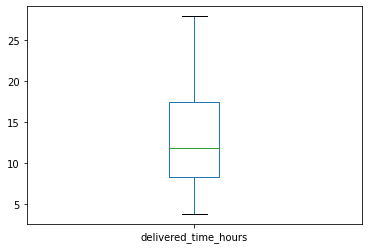

In [724]:
merged_df.boxplot(column=['delivered_time_hours'], 
                       grid=False)

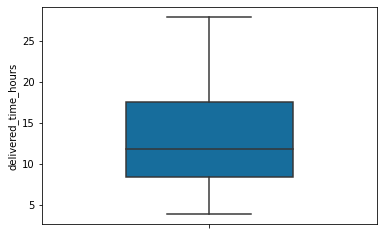

In [733]:
bplot = sns.boxplot(y='delivered_time_hours', 
                 data=merged_df, 
                 width=0.5,
                 palette="colorblind")

In [734]:
plot_file_name="boxplot_and_swarmplot_with_seaborn.jpg"
 
# save as jpeg
bplot.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

## Question 3b 
### KPI - Maximum, minimum and average number of unique items in one order

In [739]:
merged_df['num_of_lines']=merged_df['num_of_lines'].astype(int)

In [740]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 0 to 732
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   order_id              704 non-null    object         
 1   in_progress           704 non-null    datetime64[ns] 
 2   picked                704 non-null    datetime64[ns] 
 3   started_dispatch      703 non-null    datetime64[ns] 
 4   in_dispatch_buffer    704 non-null    datetime64[ns] 
 5   packed                704 non-null    datetime64[ns] 
 6   dispatched            704 non-null    datetime64[ns] 
 7   order_aborted         0 non-null      datetime64[ns] 
 8   order_created_at      704 non-null    datetime64[ns] 
 9   delivery_schedule     704 non-null    datetime64[ns] 
 10  trip_id               704 non-null    object         
 11  num_of_lines          704 non-null    int32          
 12  pr_time               704 non-null    timedelta64[ns]
 13  deliv

In [749]:
print(merged_df['num_of_lines'].agg([min,max,np.mean]))

min      1.000000
max     30.000000
mean     6.413352
Name: num_of_lines, dtype: float64


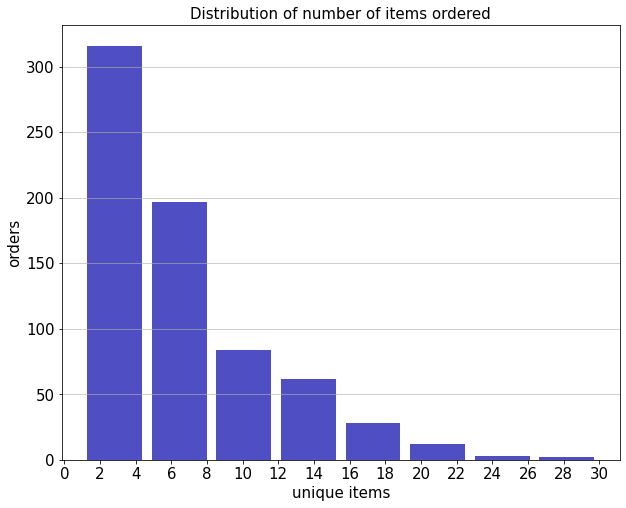

In [758]:
plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=merged_df['num_of_lines'], bins=8, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('unique items',fontsize=15)
plt.ylabel('orders',fontsize=15)
plt.xticks(fontsize=15)
plt.xticks(np.arange(0, 31, 2))
plt.yticks(fontsize=15)
plt.title('Distribution of number of items ordered',fontsize=15)
plt.show()